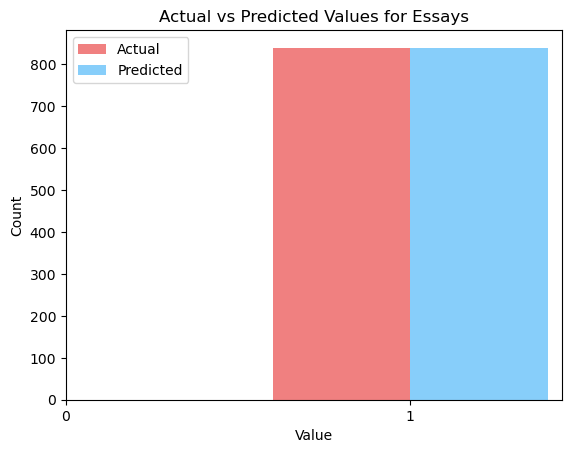

MO Essays Accuracy: 100.00 %


In [1]:

import opendatasets as od
od.download("https://www.kaggle.com/datasets/carlmcbrideellis/llm-mistral-7b-instruct-texts")
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import csv


# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.strip()
    tokens = text.split()
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Load/Process more data (mo_essays)
mo_essays_path = 'C:\\Users\\jpark\\llm-mistral-7b-instruct-texts\\Mistral7B_CME_v6.csv'
mo_essays = pd.read_csv(mo_essays_path)
mo_essays['cleaned_text'] = mo_essays['text'].apply(preprocess_text)
mo_essays = mo_essays[['prompt_id', 'cleaned_text', 'generated']]


# Split constants and variable for mo_essays
X_mo_essays = mo_essays[['prompt_id', 'cleaned_text']]
y_mo_essays = mo_essays[['generated']]

# Split data into training and test sets for mo_essays
X_train_mo_essays, X_test_mo_essays, y_train_mo_essays, y_test_mo_essays = train_test_split(
    X_mo_essays, y_mo_essays, test_size=0.2, random_state=42, stratify=y_mo_essays
)

# Vectorize the text data for mo_essays
vectorizer_mo_essays = CountVectorizer()
X_train_vec_mo_essays = vectorizer_mo_essays.fit_transform(X_train_mo_essays['cleaned_text'])
X_test_vec_mo_essays = vectorizer_mo_essays.transform(X_test_mo_essays['cleaned_text'])

# Create an instance of classifier and train on mo_essays
model_mo_essays = RandomForestClassifier(n_estimators=100, random_state=42)
model_mo_essays.fit(X_train_vec_mo_essays, y_train_mo_essays.values.ravel()) 

# Make predictions on mo_essays
predictions_mo_essays = model_mo_essays.predict(X_test_vec_mo_essays)

# Add predictions to X_test_mo_essays
X_test_mo_essays['predicted'] = predictions_mo_essays

# Compare actual and predicted values for mo_essays
#comparison_mo_essays = X_test_mo_essays[['generated', 'predicted']]
# Compare actual and predicted values for mo_essays
comparison_mo_essays = pd.DataFrame({
    'generated': y_test_mo_essays['generated'],
    'predicted': X_test_mo_essays['predicted']
})

# Prediction count for essays
actual_counts_essays = y_test_mo_essays['generated'].value_counts().sort_index()
predicted_counts_essays = X_test_mo_essays['predicted'].value_counts().sort_index()

# Bar chart for actual values for essays
plt.bar(actual_counts_essays.index - 0.2, actual_counts_essays, width=0.4, label='Actual', color='lightcoral')

# Bar chart for predicted values for essays
plt.bar(predicted_counts_essays.index + 0.2, predicted_counts_essays, width=0.4, label='Predicted', color='lightskyblue')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Actual vs Predicted Values for Essays')
plt.xticks([0, 1])

# Adding legend
plt.legend()

# Show the bar chart
plt.show()

# Evaluate your model for mo_essays
print(f'MO Essays Accuracy: {accuracy_score(y_test_mo_essays, predictions_mo_essays) * 100:.2f} %')


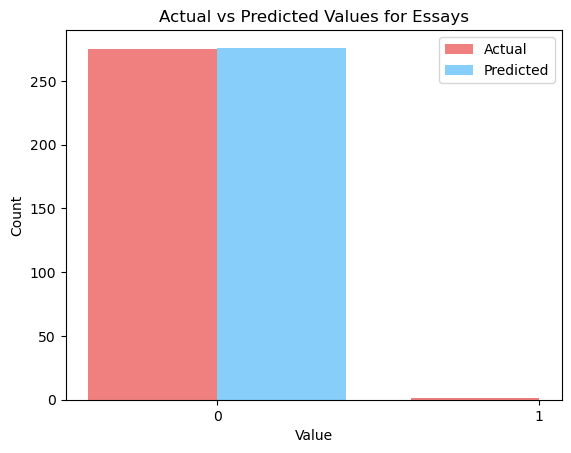

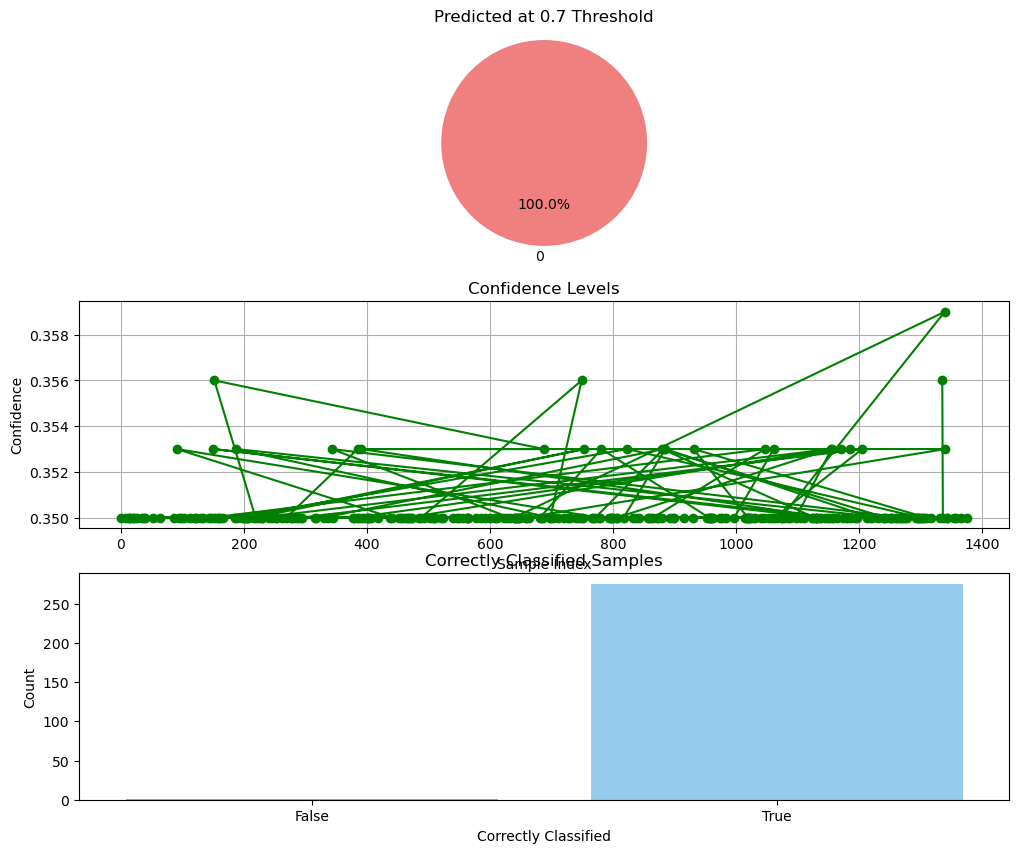

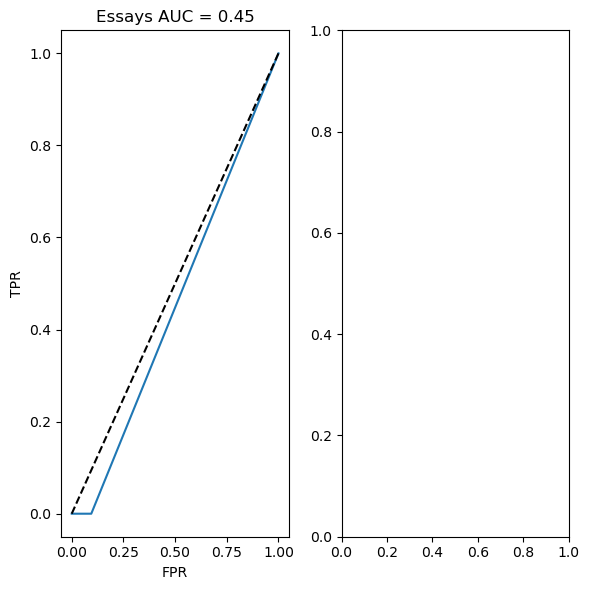

AUC-ROC Score for Essays: 45.27 %
Accuracy: 99.64 %


In [2]:


# Repeat the same steps for essays
# Load train data (essays)
essays = pd.read_csv('train_essays.csv')
essays['cleaned_text'] = essays['text'].apply(preprocess_text)
essays = essays[['id', 'cleaned_text', 'generated']]

# Split constants and variable for essays
X_essays = essays[['id', 'cleaned_text']]
y_essays = essays[['generated']]

# Split data into training and test sets for essays
X_train_essays, X_test_essays, y_train_essays, y_test_essays = train_test_split(
    X_essays, y_essays, test_size=0.2, random_state=42, stratify=y_essays
)

# Vectorize the text data for essays
vectorizer_essays = CountVectorizer()
X_train_vec_essays = vectorizer_essays.fit_transform(X_train_essays['cleaned_text'])
X_test_vec_essays = vectorizer_essays.transform(X_test_essays['cleaned_text'])

# Create an instance of classifier and train on essays
model_essays = RandomForestClassifier(n_estimators=100, random_state=42)
model_essays.fit(X_train_vec_essays, y_train_essays.values.ravel())

# Make predictions on essays
predictions_essays = model_essays.predict(X_test_vec_essays)

# Add predictions to X_test_essays
X_test_essays['predicted'] = predictions_essays

# Compare actual and predicted values for essays
# comparison_essays = X_test_essays[['generated', 'predicted']]
comparison_essays = pd.DataFrame({
    'generated': y_test_essays['generated'],
    'predicted': X_test_essays['predicted']
})

# Prediction count for essays
actual_counts_essays = y_test_essays['generated'].value_counts().sort_index()
predicted_counts_essays = X_test_essays['predicted'].value_counts().sort_index()

# Bar chart for actual values for essays
plt.bar(actual_counts_essays.index - 0.2, actual_counts_essays, width=0.4, label='Actual', color='lightcoral')

# Bar chart for predicted values for essays
plt.bar(predicted_counts_essays.index + 0.2, predicted_counts_essays, width=0.4, label='Predicted', color='lightskyblue')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Actual vs Predicted Values for Essays')
plt.xticks([0, 1])

# Adding legend
plt.legend()

# Show the bar chart
plt.show()

# Get class probabilities
probabilities = model_essays.predict_proba(X_test_vec_essays)

# Add probabilities to X_test
X_test_essays['prob_0'] = probabilities[:, 0]
X_test_essays['prob_1'] = probabilities[:, 1]

# Threshold Analysis
threshold = 0.75
X_test_essays['predicted_75'] = (X_test_essays['prob_1'] > threshold).astype(int)

# Confidence Levels
# X_test_essays['confidence'] = X_test_essays[['prob_0', 'prob_1']].max(axis=1)
X_test_essays['confidence'] = (X_test_essays['prob_0'] * 0.35) + (X_test_essays['prob_1'] * 0.65) 

# Misclassified Samples Analysis
X_test_essays['correctly_classified'] = X_test_essays['predicted'] == y_test_essays['generated']

# Set up a 3x1 subplot grid
plt.figure(figsize=(12, 10))

# Pie chart for predicted_75
plt.subplot(3, 1, 1)
sizes = X_test_essays['predicted_75'].value_counts()

plt.pie(sizes, labels=sizes.index.astype(str), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Predicted at 0.7 Threshold')
plt.axis('equal')

# Line graph for confidence
plt.subplot(3, 1, 2)
plt.plot(X_test_essays.index, X_test_essays['confidence'], marker='o', linestyle='-', color='green')
plt.title('Confidence Levels')
plt.xlabel('Sample Index')
plt.ylabel('Confidence')
plt.grid(True)

# Horizontal bar chart for correctly_classified
plt.subplot(3, 1, 3)
sns.countplot(x='correctly_classified', data=X_test_essays, palette=['lightcoral', 'lightskyblue'])
plt.title('Correctly Classified Samples')
plt.ylabel('Count')
plt.xlabel('Correctly Classified')

# Adjust layout to prevent overlapping
#plt.tight_layout()
plt.show()

# AUC - ROC curve
def plot_roc(y_true, y_score, label, ax):
    # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr)
    
    # Plot the diagonal line representing random chance
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')
    
    # Set labels and title
    ax.set_ylabel('TPR')  # True Positive Rate (Sensitivity)
    ax.set_xlabel('FPR')  # False Positive Rate (1 - Specificity)
    ax.set_title(f"{label} AUC = {roc_auc_score(y_true, y_score):.2f}")


# AUC - ROC curve chart for essays
fig, ax = plt.subplots(1, 2, figsize=(6, 6))
plot_roc(y_test_essays['generated'], probabilities[:, 1], 'Essays', ax=ax[0])
fig.tight_layout()
plt.show()

auc_roc_essays = roc_auc_score(y_test_essays['generated'], probabilities[:, 1])
print(f'AUC-ROC Score for Essays: {auc_roc_essays * 100:.2f} %')

# Evaluate your model
print(f'Accuracy: {accuracy_score(y_test_essays, predictions_essays) * 100:.2f} %')



In [4]:

# Load and preprocess the test data 
test_data = pd.read_csv('test_essays.csv')
test_data['cleaned_text'] = test_data['text'].apply(preprocess_text)  

# Vectorize the cleaned_text using the vectorizer fitted on mo_essays
test_data_vec = vectorizer_mo_essays.transform(test_data['cleaned_text'])

# Get class probabilities for each sample
test_probabilities = model_mo_essays.predict_proba(test_data_vec)

# Ensure that test_probabilities has the correct shape
if test_probabilities.shape[1] == 1:
    # If the model predicts a single class, create a second column with the complement
    test_probabilities = np.column_stack((1 - test_probabilities[:, 0], test_probabilities[:, 0]))

# Add probabilities to the test data
test_data['prob_0'] = test_probabilities[:, 0]
test_data['prob_1'] = test_probabilities[:, 1]

# Calculate confidence level as the weighted average of prob_0 and prob_1
test_data['confidence'] = (test_data['prob_0'] * 0.35) + (test_data['prob_1'] * 0.65) 

# Write the probabilities to a CSV file with rounded confidence scores
with open('submission.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'generated'])
    for i, probability in test_data[['id', 'confidence']].itertuples(index=False):
        rounded_confidence = round(probability, 2)
        writer.writerow([i, rounded_confidence])


# Read and print the content of the submission.csv file
submission_path = 'submission.csv'
with open(submission_path, 'r') as file:
    content = file.read()
    print(content)


id,generated
0000aaaa,0.65
1111bbbb,0.65
2222cccc,0.65

